### 项目描述
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

Rossmann公司在7个欧洲国家一共拥有3000家药妆店。目前Rossmann商店经理需要预测未来6周的销售额。商店的销售额会受到许多因素的影响，包括促销，竞争对手，学校，节假日，季度和区域性。由上千位背景不同的经理基于他们的环境而预测出的销售额差别是非常大的。

In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! 

在Rossmann的第一次Kaggle竞赛中，它需要你为它预测德国境内的1115家药妆店6周内每天的销售额。可靠的销售额可以激发员工的工作积极性和产出。通过帮助Rossmann创建一个可靠，强壮的预测模型，你可以帮助Rossmann的经理们关注对他们来说最重要的东西：客户和团队。


### 问题描述
  项目选自Kaggle的一个竞赛项目 [Rossmann Store Sales](https://www.kaggle.com/c/rossmann-store-sales)，目标是预测Rossmann的销售额。是一个监督学习的回归类的问题，可以用LinearRegression，XGBoost，神经网络等机器学习的算法来预测销售额。
  
### 数据集的下载
数据全部可以从[Kaggle](https://www.kaggle.com/c/rossmann-store-sales/data)上下载。一共提供了4个文件：

- train.csv - historical data including Sales (训练集，包括了销售额)
- test.csv - historical data excluding Sales （测试集，没有包括销售额）
- sample_submission.csv - a sample submission file in the correct format （最终需要提交的文件模板）
- store.csv - supplemental information about the stores （补充信息）

#### 数据描述

- Id - an Id that represents a (Store, Date) duple within the test set（测试集中的唯一索引，由商店和日期表示，可以理解为数据库中的联合主键）
- Store - a unique Id for each store （商店的唯一索引）
- Sales - the turnover for any given day (this is what you are predicting) （销售额，需要在测试集中预测）
- Customers - the number of customers on a given day （当天的客户数量）
- Open - an indicator for whether the store was open: 0 = closed, 1 = open （是否营业，0.否 1.是）
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None （法定假日，大部分商店都会放假，但也有些列外，a = 公共假日，b = 复活节，c = 圣诞节， 0 = 无）
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools （学校假日，代表商店是否收到学校临时停课的影响）
- StoreType - differentiates between 4 different store models: a, b, c, d （商店类型）
- Assortment - describes an assortment level: a = basic, b = extra, c = extended （商店分类级别，a = 基本，b = 额外， c = 扩展）
- CompetitionDistance - distance in meters to the nearest competitor store （最近的竞争者的距离，单位：米）
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened （最近的竞争者，开始营业的月及年份）
- Promo - indicates whether a store is running a promo on that day （当天是否有促销）
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating（持续促销， 0 = 未参与， 1 = 参与）
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2 （持续促销开始的年/周数）
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store （促销的间隔）

至此我对项目有了一个大概的了解，接下来我们需要对数据进行探索。

### 数据的探索

- 首先利用pandas的API读取train,store,test3个文件，然后调用df的head方法，快速浏览下数据；
- train存放的是1151个商店在不同时期的销售额，而store存放的是各个商店的一些特征，test存放的是测试集；
- 训练集的数据为【2013年1月1号到2015年7月31号】1151零售店的销售额；
- 测试集需要预测的数据为【2015年8月1号到2015年9月17号】1151零售点的销售额；

In [5]:
from sklearn.preprocessing import MinMaxScaler
import math
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(color_codes=True)

train = pd.read_csv('data/train.csv')
store = pd.read_csv('data/store.csv')
test = pd.read_csv('data/test.csv')

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# 通过info方法观察数据
store.info()
print("============================================")
train.info()
print("============================================")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             10

### 数据预处理 - Store
- 首先我们对store文件里的特征进行预处理，我们依次来看下每个特征，是否需要处理
- Store，商店的ID，这个我们暂时先不做预处理操作。因为在merge2个dataframe的时候会用它作为key。
- StoreType，商店类型，需要独热编码；
- Assortment，销售种类，需要独热编码；
- CompetitionDistance，竞争对手距离，首先需要处理空值（设为0），再查看分布图，确定是否需要做对数处理，然后再做归一化处理；
- CompetitionOpenSinceYeah，竞争对手营业年份，需要处理空值，设置空值为1900；
- CompetitionOpenSinceYear，竞争对手营业月份，需要处理空值，设置空值为1
- Promo2，是否有持续促销，丢弃；
- PromoSinceWeek，第几周开始促销的，丢弃；
- Promo2SinceYear，哪一年开始促销的，丢弃；
- PromoInterval，促销的间隔，丢弃；

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,0.636093,9.0,2008.0,0,0,1,0,1,0,0
1,2,0.564882,11.0,2007.0,1,0,0,0,1,0,0
2,3,0.850442,12.0,2006.0,1,0,0,0,1,0,0
3,4,0.572353,9.0,2009.0,0,0,1,0,0,0,1
4,5,0.917175,4.0,2015.0,1,0,0,0,1,0,0


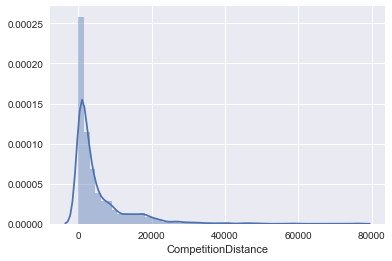

In [7]:
# 首先处理store中可能为NaN的特征
store['CompetitionDistance'] = store['CompetitionDistance'].apply(lambda x: 0 if math.isnan(x) else x)
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].apply(lambda x: 1 if math.isnan(x) else x)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].apply(lambda x: 1900 if math.isnan(x) else x)

# plot出CompetitionDistance的分布图
sns.distplot(store['CompetitionDistance']);
# 处理完NaN的数据后，查看CompetitionDistance的分布图，发现CompetitionDistance 数据倾斜很明显，需要对数处理
store['CompetitionDistance'] = store['CompetitionDistance'].apply(lambda x: np.log(x + 1))

# 拆分属性完成后，可以丢弃掉属性
drops = ['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
store = store.drop(drops, axis = 1)
# 对CompetitionDistance做归一化操作，初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numberic = ['CompetitionDistance']
store[numberic] = scaler.fit_transform(store[numberic])
# 对剩下的column进行独热编码处理
store = pd.get_dummies(store)
# 调用head方法查看下预处理完之后的数据
store.head()

### 数据预处理 - train and test
- Store的预处理基本到此完成，接下来需要对train和test做预处理，train和test数据内容基本一致，因此处理完train按照同样的方式处理test就行了
- Store，商店的唯一索引，不做处理；
- DayOfWeek，1至7的数字，独热编码；
- Date，日期，需要转换成多个特征，比如年，月，日，一个年的第几周，一个月的第几周，一年的第几天等；
- Sales，销量，提取为标签；
- Customers，当日客户数，直接drop掉；
- Open，是否营业，不做任何处理；
- Promo，是否促销，不做任何处理；
- StateHoliday，是否法定假日，不做任何处理；
- SchoolHoliday，是否学校放假，不做任何处理；

In [8]:
# check head data
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
# 打印
def plot_sales_by_date(dates, sales):
    fig, (ax1) = plt.subplots(1, 1, figsize=(20, 10))
    ax1.plot(dates, sales, label='train')
    ax1.set_title("Sales/Date")
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Sale')
    plt.show()

# 处理 sales的异常值
def handle_outliers(train):
    # 计算给定特征的Q1（数据的25th分位点）
    Q1 = np.percentile(train['Sales'], 25)
    # 计算给定特征的Q3（数据的75th分位点）
    Q3 = np.percentile(train['Sales'], 75)
    # 使用四分位范围计算异常阶（1.5倍的四分位距）
    step = (Q3 - Q1) * 1.5
    
    sales = np.zeros(train.shape[0])
    index = 0
    
    for sale in train['Sales']:
        if (sale < Q1 - step):
            sales[index] = sale
        elif (sale > Q3 + step):
            sales[index] = Q3 + step
        else:
            sales[index] = sale
        index += 1
    
    new_df = pd.DataFrame({'Sales': sales}, index=train.index)
    train.update(new_df)

def week_of_year(dt):
    return dt.isocalendar()[1]

def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()
    return int(math.ceil(adjusted_dom/7.0))

def day_of_year(dt):
    return dt.timetuple().tm_yday

def generate_all_features_in_one_column(x):
    year = x.split('-')[0]
    month = x.split('-')[1]
    date = x.split('-')[2]
    dt = datetime.date(int(year), int(month), int(date))
    woy = week_of_year(dt)
    wom = week_of_month(dt)
    doy = day_of_year(dt)
    return "{}-{}-{}-{}-{}-{}".format(year,month,date,woy,wom,doy)

def split_date(df):
    df['Date'] = df['Date'].apply(lambda x: generate_all_features_in_one_column(x))
    df['Year'] = df['Date'].apply(lambda x: x.split('-')[0])
    df['Month'] = df['Date'].apply(lambda x: x.split('-')[1])
    df['Day'] = df['Date'].apply(lambda x: x.split('-')[2])
    df['WeekOfYear'] = df['Date'].apply(lambda x: x.split('-')[3])
    #df['WeekOfMonth'] = df['Date'].apply(lambda x: x.split('-')[4])
    #df['DayOfYear'] = df['Date'].apply(lambda x: x.split('-')[5])
    df = df.drop(['Date'], axis=1)

    return df

def preprocess_data(df):
    # StateHoliday，处理为不放假 0，放假 1
    df["StateHoliday"] = df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})
    df = split_date(df)
    df_day_of_week  = pd.get_dummies(df['DayOfWeek'], prefix='Day')
    df = df.join(df_day_of_week)
    df = df.drop(['DayOfWeek'], axis=1)
    return df

In [10]:
# 训练集-预处理
train = preprocess_data(train)
# 合并特征
train = pd.merge(train, store, on='Store')
# 查看训练集预处理后的数据
train.head()

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5263,555,1,1,0,1,2015,07,31,...,0.636093,9.0,2008.0,0,0,1,0,1,0,0
1,1,5020,546,1,1,0,1,2015,07,30,...,0.636093,9.0,2008.0,0,0,1,0,1,0,0
2,1,4782,523,1,1,0,1,2015,07,29,...,0.636093,9.0,2008.0,0,0,1,0,1,0,0
3,1,5011,560,1,1,0,1,2015,07,28,...,0.636093,9.0,2008.0,0,0,1,0,1,0,0
4,1,6102,612,1,1,0,1,2015,07,27,...,0.636093,9.0,2008.0,0,0,1,0,1,0,0


In [11]:
# 处理open为nan的数据
index = test['Open'].index[test['Open'].apply(np.isnan)]
# 分析后发现，那几天都为工作日并且没有放假，所以全部设置为1
test['Open'][index] = 1
# 训练集-预处理
test = preprocess_data(test)
# 合并特征
test = pd.merge(test, store, on='Store')
# 查看训练集合并后的情况
test.head()

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Id,Store,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,1,1.0,1,0,0,2015,09,17,38,...,0.636093,9.0,2008.0,0,0,1,0,1,0,0
1,857,1,1.0,1,0,0,2015,09,16,38,...,0.636093,9.0,2008.0,0,0,1,0,1,0,0
2,1713,1,1.0,1,0,0,2015,09,15,38,...,0.636093,9.0,2008.0,0,0,1,0,1,0,0
3,2569,1,1.0,1,0,0,2015,09,14,38,...,0.636093,9.0,2008.0,0,0,1,0,1,0,0
4,3425,1,0.0,0,0,0,2015,09,13,37,...,0.636093,9.0,2008.0,0,0,1,0,1,0,0


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.externals import joblib

#先选取一家店来做训练,来查找最佳模型参数
train_store = train[train['Store'] == 897]
handle_outliers(train_store)
# 提取标签
train_store_labels = train_store['Sales']
# 从训练集中移除标签
train_store = train_store.drop(['Store','Sales','Customers'], axis=1)
# 将数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(train_store, train_store_labels, test_size = 0.2, random_state = 0)
# 初始化回归模型
regr = RandomForestRegressor()

scoring_fnc = make_scorer(r2_score)

param = {'max_depth':[5,6,7], 'n_estimators':[10,20,30]}

grid = GridSearchCV(regr, param, scoring=scoring_fnc)

grid.fit(X_train, y_train)

estimator = grid.best_estimator_

pred = estimator.predict(X_test)

score = r2_score(y_test, pred)

print(grid.best_params_)

print(score)

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


{'max_depth': 7, 'n_estimators': 20}
0.7504483623279599


In [14]:
# 利用上面的最佳模型参数来训练每个商店，这里每个商店都拥有自己的模型
scores = []

for i in range(1, train['Store'].max()+1):
    #选取一家店来做训练
    train_store = train[train['Store'] == i]
    # 处理异常数据
    handle_outliers(train_store)
    # 提取标签
    train_store_labels = train_store['Sales']
    # 从训练集中移除标签
    train_store = train_store.drop(['Store','Sales','Customers'], axis=1)
    # 将数据切分成训练集和测试集
    #X_train, X_test, y_train, y_test = train_test_split(train_store, train_store_labels, test_size = 0.2, random_state = 0)
    # 初始化回归模型
    regr = RandomForestRegressor(max_depth=7, n_estimators=20, random_state=0)
    regr.fit(train_store, train_store_labels)
    #pred = regr.predict(X_test)
    #score = r2_score(y_test, pred)
    #scores.append(score)
    # 保存模型
    joblib.dump(regr, 'saved_models\store_{}.pkl'.format(i)) 

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)
c:\users\tracy\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:4290: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [15]:
from sklearn.externals import joblib

def loal_and_predit(i, x):
    model_path = 'saved_models\store_{}.pkl'.format(i)
    regr = joblib.load(model_path)
    pred = regr.predict(x)
    return pred

def update_dataframe(df, ids, pred, features):
    features_day_7 = features['Day_7']
    indexes = features_day_7.index.values
    for i, sid in enumerate(ids):
        # if day_7 = 1 means it's sunday set sales to 0 directly
        if (features['Day_7'][indexes[i]] == 1):
            df['Sales'][df['Id'] == sid] = 0
        else:
            df['Sales'][df['Id'] == sid] = pred[i]
        

def generate_submission_file():
    # load submission sample file
    df = pd.read_csv('data\sample_submission.csv')
    for i in range(1, test['Store'].max()+1):
        # choose one store at a time
        test_feature = test[test['Store'] == i]
        # do preidct only when feature length greater than 0
        if (len(test_feature) > 0): 
            # save ids
            ids = test_feature['Id']
            # remove Id and Store for preidct
            test_feature = test_feature.drop(['Id','Store'], axis=1)
            # predict
            pred = loal_and_predit(i, test_feature)
            # write predictions into submission according to Ids
            update_dataframe(df, ids, pred, test_feature)
    # generate new submission file
    df.to_csv('./data/random_forest_sub.csv', index=None)
    
    
def get_low_score():
    for idx, s in enumerate(scores):
        if (s < 0.8):
            print(idx + 1, s)

# 基于模型生成我们自己的Kaggle提交文件，最终Kaggle得分为0.14837分
generate_submission_file()

In [30]:
#再用xgb试一下，这里使用全部商店来做训练
import xgboost as xgb
regressor = xgb.XGBRegressor(n_estimators=3000, nthread=-1, max_depth=12,
                         learning_rate=0.02, silent=True, subsample=0.9, colsample_bytree=0.7)
# 提取标签
train_labels = train['Sales']
# 从训练集中移除标签
train_features = train.drop(['Sales','Customers'], axis=1)

regressor.fit(train_features.as_matrix(), train_labels)

test_features = test.drop(['Id'], axis=1)

pred = regressor.predict(test_features.as_matrix())

result=pd.DataFrame({"Id": test["Id"], "Sales": pred})

# XGB最终得分为0.140分
result.to_csv("data\xgboostregressor.csv", index = False) 

### 总结
- 得分不算高，但因为时间关系不再继续优化，毕业项目是猫狗识别，这只是个兴趣项目
- 这个项目的关键是解决时间序列数据的问题
- 优化方向，继续调优XGB的参数，看到论坛其他同学调参后XGB可以达到0.10左右的分数
- 补充数据，看到第一名的介绍，特征集中竟然有天气等特征；应该是从别的地方扒的数据，确实天气对于外出购物来说是一个很重要的属性；
- 移除部分训练数据，测试集中并未覆盖所有商店，我们可以只训练测试集中有的那些商店
- OVER！！！